(1000, 5)
(1000,)
(800, 5)


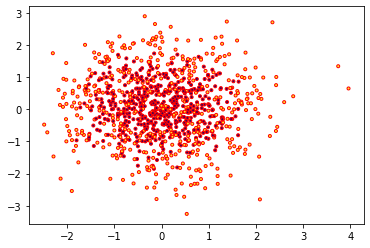

In [11]:
from math import exp
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Construct dataset

x1, y1 = make_gaussian_quantiles(
    n_samples=1000, n_features=5,
    n_classes=2, random_state=1)
print(x1.shape)
print(y1.shape)
x_train, x_test, y_train, y_test = train_test_split(
    x1, y1, test_size=0.2, random_state=0)
print(x_train.shape)
plt.scatter(x1[:, 0], x1[:, 1], marker="o", c=y1, s=9, edgecolor="r")
plt.show()

In [12]:
# Calculate neuron activation for an input

def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation

def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [14]:
# Forward propagate input to a network output

def forward_propagate(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs


# test forward propagation

network = [[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
           [{'weights': [0.2550690257394217, 0.49543508709194095]}, {'weights': [0.4494910647887381, 0.651592972722763]}]]
row = [1, 0, None]
output = forward_propagate(network, row)
print(output)

[0.6629970129852887, 0.7253160725279748]
